In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

### read dataset from pandas

In [2]:
# make sure names are unique
xl = pd.ExcelFile("C:/computer_harddrive/2016_oceanus/HPLC/f_micro.xlsx")
df = xl.parse("plot")

df[df<0.01]=np.nan
df[df>0.99]=np.nan
df.head()

,f_micro,f_nano,f_pico,chl,chl_std,hira_pico,hira_nano,hira_micro,spec3_pico,spec3_nano,spec3_micro,spec2_pico,spec2_nano,spec2_micro,bbp_pico,bbp_nano,bbp_micro
0,0.313039,0.388396,0.298565,0.525221,0.033256,0.297940,0.459126,0.242933,0.128852,NaN,0.871148,0.682363,NaN,0.317637,0.702571,0.261731,0.035699
1,0.406262,0.337438,0.256300,0.489012,0.016161,0.303362,0.469361,0.227277,0.200933,NaN,0.799067,0.656426,NaN,0.343574,0.781627,0.202093,0.016280
2,0.252279,0.432422,0.315299,0.451047,0.066070,0.309497,0.480025,0.210478,0.156743,NaN,0.843257,0.837917,NaN,0.162083,0.604608,0.322629,0.072763
3,0.400044,0.353642,0.246314,0.670620,0.016167,0.279027,0.418810,0.302163,0.115180,NaN,0.884820,NaN,NaN,NaN,0.683043,0.275065,0.041892
4,0.259383,0.419585,0.321033,NaN,NaN,0.242058,0.333477,0.424465,0.345539,0.065627,0.588834,0.675660,NaN,0.324340,0.640039,0.302360,0.057601


### plot figures

In [3]:
# set vars to show in the plot
x_var = ['hira_pico','hira_nano','hira_micro','spec3_pico','spec3_nano','spec3_micro','spec2_pico',
      'spec2_nano','spec2_micro','bbp_pico','bbp_nano','bbp_micro']
y_var = ['f_pico','f_nano','f_micro']
num = np.arange(len(x_var))
num%3
xx = np.arange(0,1,0.1)

In [11]:
line_x = np.arange(0,1.2,0.1)
line_y = line_x

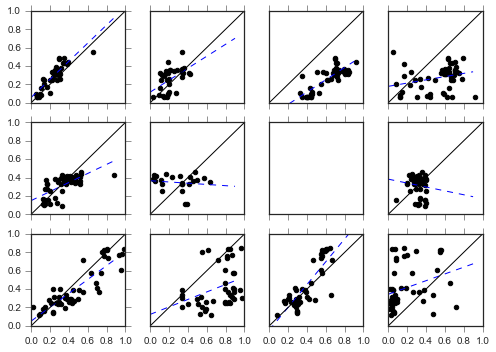

In [12]:
from textwrap import wrap
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, figsize=(7,5))

for xi, i in zip(x_var, num):
    col = i//3
    row = i%3
    ax = axes[row, col] # intergral and mod
    
    x = df['%s' % (xi)]
    y = df[y_var[row]]
    
    if np.sum(~np.isnan(x))>0:
        mask = ~np.isnan(x) & ~np.isnan(y)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
        #r_value = np.sqrt(np.dot(y-x,y-x))
        
        ax.scatter(x,y, c='black')
        #ax.set_title("\n".join(wrap('%s $R^{2}$=%.2f RMSE=%.2f' % (xi, r_value,std_err), 20)))
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.plot(xx, slope*xx+intercept, "r--", c='blue')
        ax.plot(line_x, line_y, "r-", c='black')
    #else:
        #ax.set_title("\n".join(wrap('%s                                          ' % (xi), 20)))
        
    if col != 0:
        ax.set_yticks([])
        
plt.tight_layout()
plt.show()